# Aspects of Choosing Models


*   Business Problem Statements
*   Technical Problem Statements
*   Non-Functional Requirements
  *   Recency/ SoTA (https://paperswithcode.com/sota)
  *   Accuracy
  *   Time Performance
  *   Financial Cost of Infrastructure/Resources to train & predict




## How to convert a business problem to a technical problem
1. Understand the Business Problem:
  * Meet with Stakeholders: Engage with business stakeholders to thoroughly understand the problem they are facing.
  * Define Objectives: Clearly define the business objectives and desired outcomes.

2. Break Down the Problem:
  * Decompose the Problem:
    * Break down the problem into smaller, manageable components or tasks.
    * Identify dependencies and relationships between different aspects of the problem.

3. Define Scope & Data:
  * Scope Definition:
    * Clearly define the boundaries and scope of the system or solution.
    * Specify what is included and excluded from the project.

  * Data Requirements:
    * Identify the sources of data required for the solution.
  
  * Define Inputs and Outputs:
    * Input Specifications: Clearly define the input requirements for the system.
    * Output Specifications: Specify the expected outputs and deliverables.

## Examples

### Business Problem Statement 1

> "The retail company is experiencing fluctuations in sales and struggles to optimize inventory levels. This leads to occasional stockouts and overstock situations, impacting both customer satisfaction and operational costs. The business needs a solution to predict and manage inventory more effectively."

### Technical Problem Statement 1

> Product-wise Demand Prediction (Regression)

> Product-wise Lead-time Prediction (Regression)





### Business Problem Statement 2

> "The subscription-based service is experiencing a high rate of customer churn, impacting revenue and customer retention. The business needs a solution to predict customer churn and implement targeted retention strategies."

### Technical Problem Statement 2

> Customer Churn Prediction (Regression)

> Customer Segmentation (Clustering)

> Next Best Action (Classification)



## Choosing the right estimator (Modela)

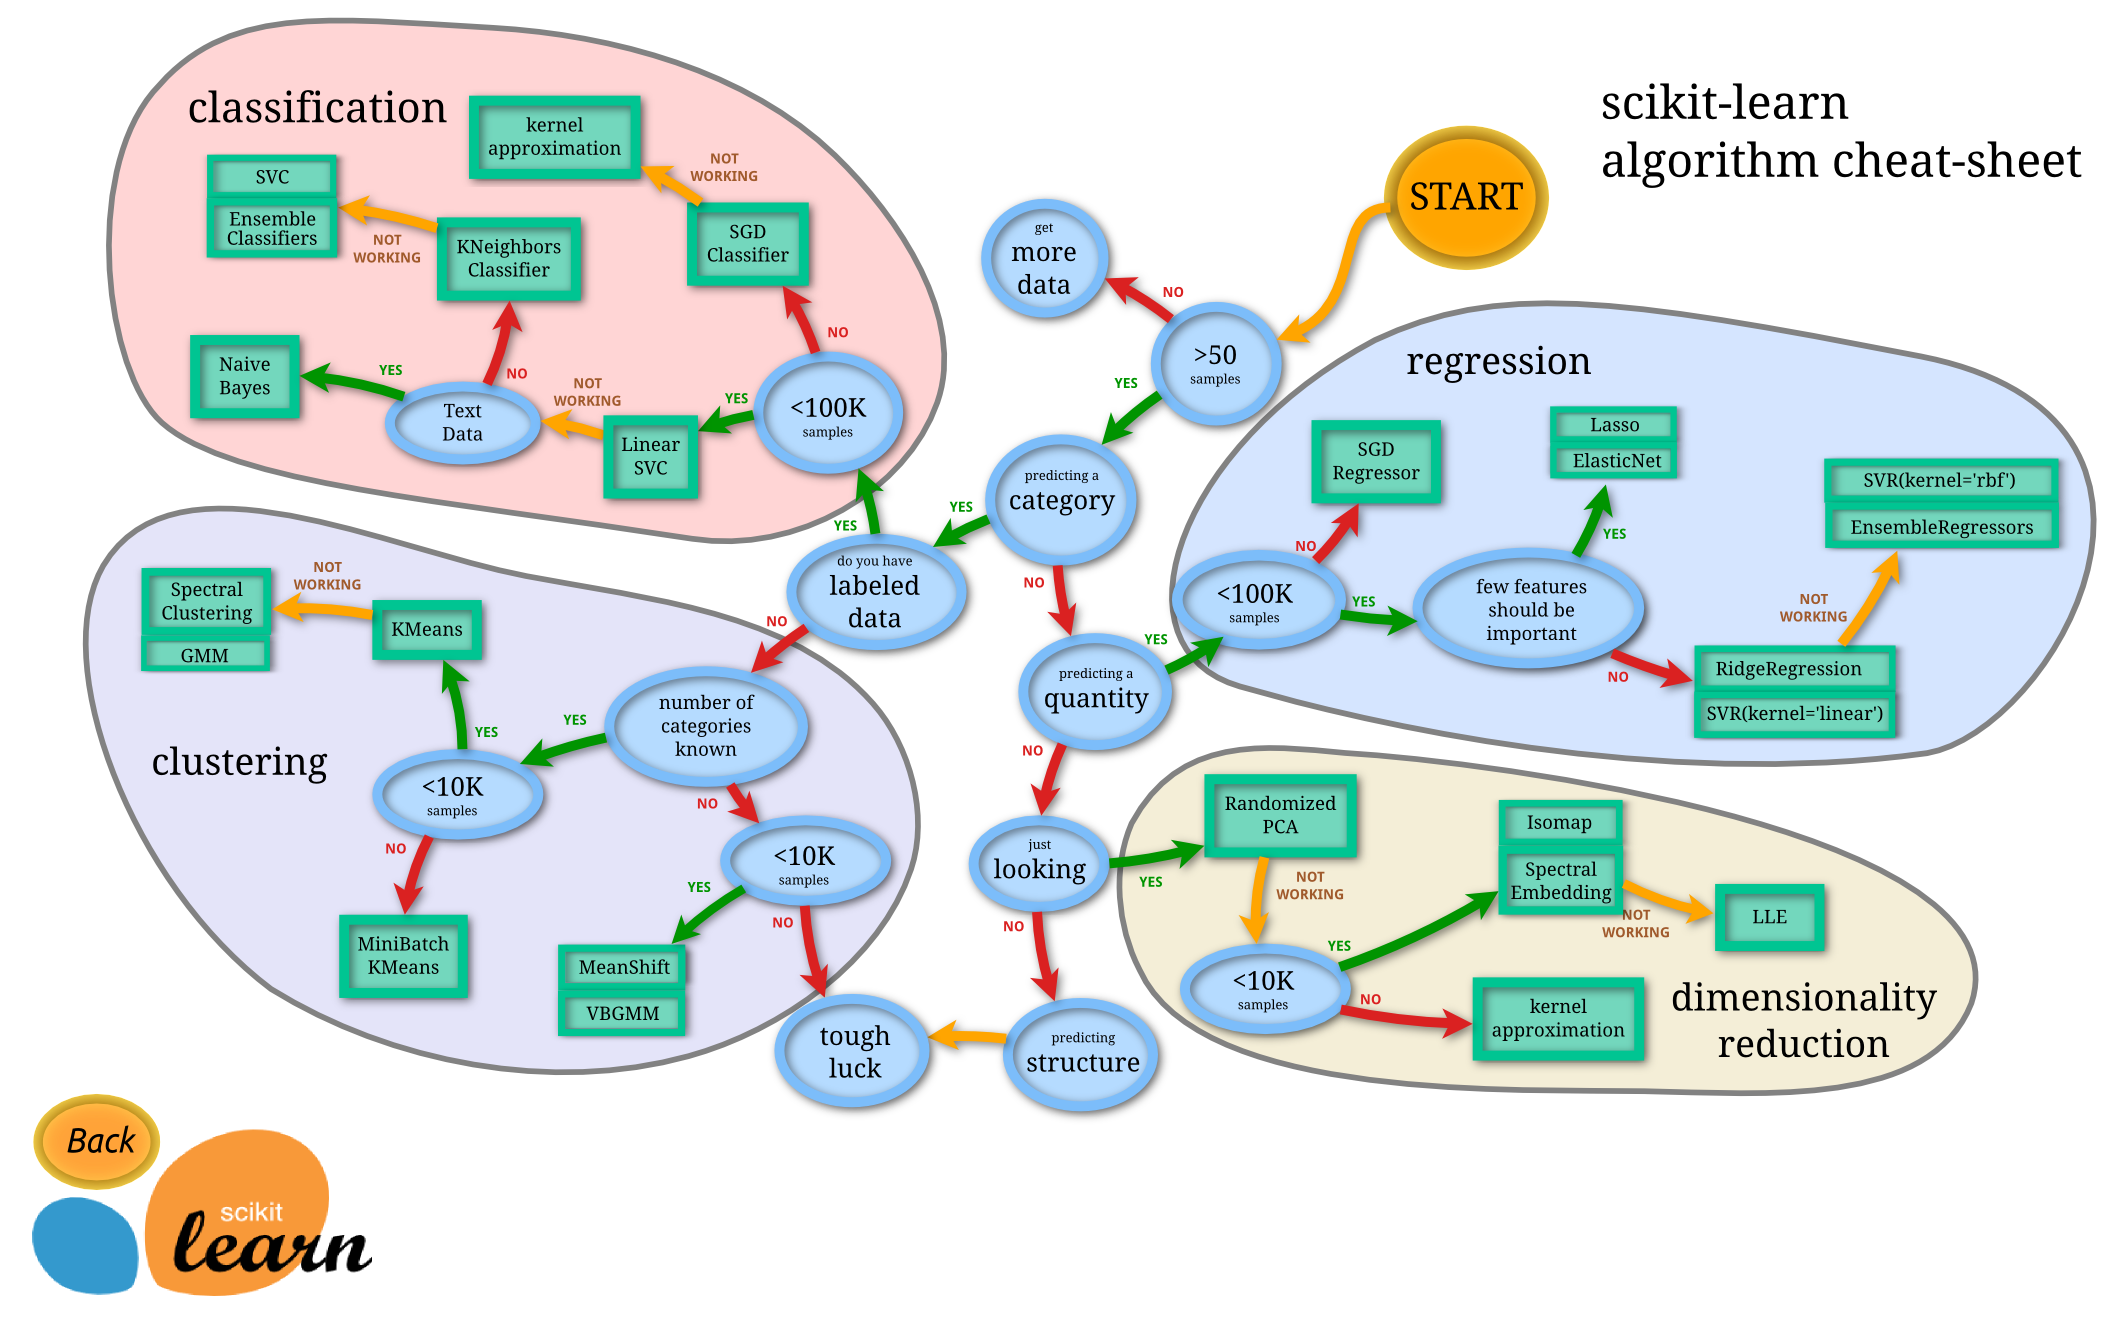

In [ ]:
from sklearn.svm import SVC
help(SVC)

## Grid Search

In [ ]:
!pip install ipython-autotime
%load_ext autotime

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load the iris dataset
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

# Define the model and the hyperparameter grid
model = SVC() # SVM Model Instance (Instantiation)
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf', 'poly'], 'gamma': [0.1, 1, 10]}

# Create the GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html

# Fit the model to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Print the best accuracy
print("Best Accuracy:", grid_search.best_score_)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
test_accuracy = best_model.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)

In [ ]:
# Access the cross-validated results
cv_results = grid_search.cv_results_

# Print information about all the models
for mean_score, params in zip(cv_results['mean_test_score'], cv_results['params']):
    print(f"Mean Accuracy: {mean_score:.4f} | Parameters: {params}")

## More Interesting libraries
* https://automl.info/tpot/
* https://docs.h2o.ai/h2o/latest-stable/h2o-docs/automl.html


### CNN

In [ ]:
# Importing necessary libraries
import numpy as np
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Reshape and normalize the images
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

# One-hot encode the labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Define the CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Flatten the output for dense layers
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))  # 10 output classes for digits 0-9

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

In [ ]:
# Importing necessary libraries
import numpy as np
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Reshape and normalize the images
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

# One-hot encode the labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Define the CNN model with modified hyperparameters
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))  # Increased the number of filters
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))  # Increased the number of neurons
model.add(layers.Dropout(0.5))  # Added dropout for regularization
model.add(layers.Dense(10, activation='softmax'))

# Compile the model with modified hyperparameters
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model with modified hyperparameters
model.fit(train_images, train_labels, epochs=10, batch_size=128, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

In this example, I increased the number of filters in the third convolutional layer and the number of neurons in the first fully connected layer. Additionally, I added a dropout layer for regularization. Feel free to experiment with other hyperparameters such as learning rate, batch size, and the number of epochs to find the configuration that works best for you.

## Choosing the right model - NLP
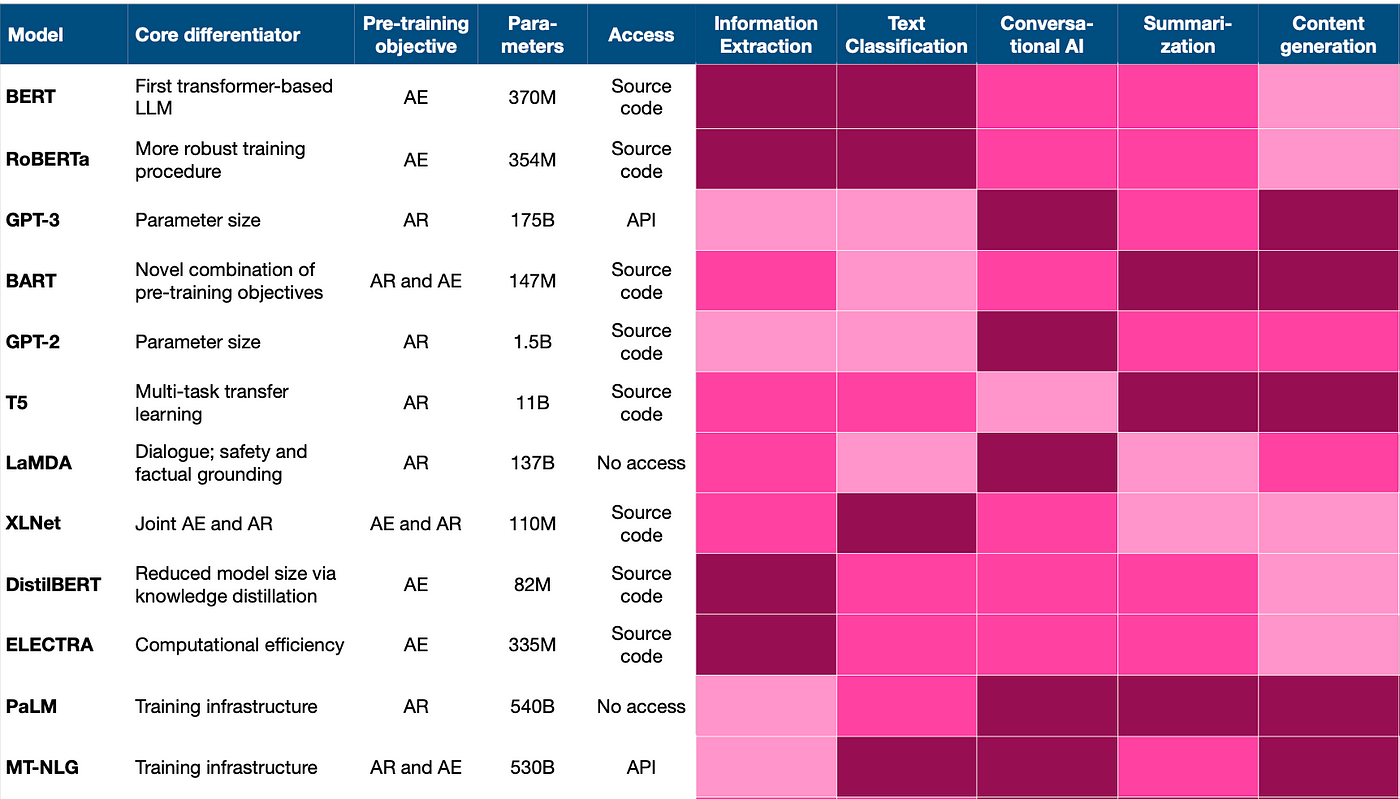

Source: https://towardsdatascience.com/choosing-the-right-language-model-for-your-nlp-use-case-1288ef3c4929